In [6]:
import cv2

root = "../datasets/imagenet2012_processed_train"
batch_size = 1
num_workers = 0
image_size = 256


In [7]:
import argparse
import os

import numpy as np
import torch
import torchvision.transforms as transforms
import torch.distributed as dist
from accelerate import Accelerator
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder, ImageNet

from utils.dataset import CustomDataset
from utils.image_tools import ImageTools

CUDA = True if torch.cuda.is_available() else False
Tensor = torch.cuda.FloatTensor if CUDA else torch.FloatTensor
Device = "cuda" if CUDA else "cpu"
imgTools = ImageTools()


def main():
    features_dir = os.path.join(root, f'imagenet{image_size}_features')
    labels_dir = os.path.join(root, f'imagenet{image_size}_labels')
    conditions_dir = os.path.join(root, f'imagenet{image_size}_conditions')

    # Setup data:
    dataset = CustomDataset(features_dir=features_dir, labels_dir=labels_dir, conditions_dir=conditions_dir)

    loader = DataLoader(
        dataset,
        batch_size=1,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True,
        drop_last=True
    )

    idx = 0
    x, y, c = None, None, None
    for x, y, c in loader:
        idx += 1
        if idx < 11:
            continue
        x = x.to(Device)
        y = y.to(Device)
        c = c.to(Device)
        x = x.squeeze(dim=1)
        y = y.squeeze(dim=1)
        c = c.squeeze(dim=1)
        x = x.detach().numpy()
        y = y.detach().numpy()
        c = c.detach().numpy()

        
        if idx > 0:
            break
            
    print(idx, x.shape, y.shape, c.shape)
    return x, y, c
        




11 (1, 3, 256, 256) (1,) (1, 256, 256)


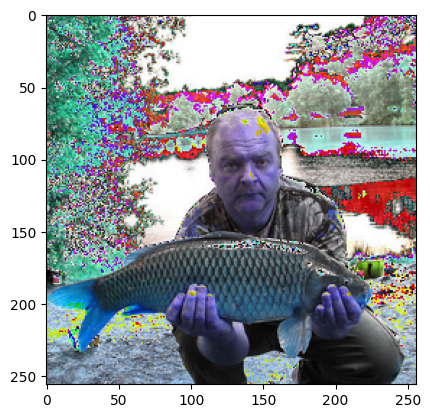

In [8]:
from matplotlib import pyplot as plt

x, y, c = main()

x_img = imgTools.pil_tensor_to_pil(torch.from_numpy(x[0]))
x_img = imgTools.pil_to_cv2(x_img)
imgTools.display(x_img)



In [9]:

x2_img = imgTools.cv2_to_pil(x_img)
x2_img.show()


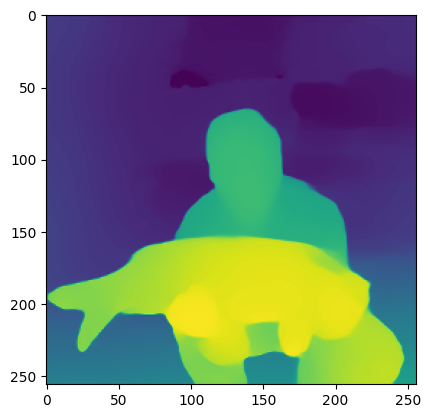

In [10]:
plt.imshow(c[0])